In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
def saveModels(model,f_name):
    model.save(f_name)
def loadModels(f_name):
    model=joblib.load(f_name)
    return model

In [53]:
df=pd.read_csv("../data/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
print(df[df['Class']==1].shape)#Fraudulent Transactions
print(df[df['Class']==0].shape)#Non Fraud Transactions

(492, 31)
(284315, 31)


In [55]:
df['Amount']=StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df=df.drop(['Time'],axis=1)
print(df.head())
df_non_fraud=df[df['Class']==0]
df_fraud=df[df['Class']==1]
print(df_non_fraud.shape)
print(df_fraud.shape)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [56]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]
#smote=SMOTE(random_state=42)
#X_res,y_res=smote.fit_resample(X,y)

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
smote=SMOTE(random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train_ov,y_train_ov=smote.fit_resample(X_train,y_train)
print(X_train_ov.shape)
print(y_train_ov.shape)

(199364, 29)
(199364,)
(85443, 29)
(85443,)
(398016, 29)
(398016,)


In [58]:
def modelCreation():
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(512,input_dim=X.shape[1],activation='relu'),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
    return model

In [59]:
def perf(true_vals,preds):
    con_mat=confusion_matrix(true_vals,preds)
    f1=f1_score(true_vals,preds)
    report=classification_report(true_vals,preds)
    accuracy=balanced_accuracy_score(true_vals,preds)
    print('F1 Score=',f1)
    print('Accuracy Score=',accuracy)
    print('Confusion Matrix=',con_mat)
    print(report)

In [60]:
def train_test(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train,epochs=20)
    preds=model.predict(X_test)
    preds=preds>=0.5

In [63]:
model=modelCreation()
model.fit(X_train_ov,y_train_ov,epochs=10)
preds=model.predict(X_test)
preds=preds>=0.5

Epoch 1/10
12438/12438 [==============================] - 21s 2ms/step - loss: 0.0162 - accuracy: 0.9958 - auc_8: 0.9995 - precision_8: 0.9952 - recall_8: 0.9963
Epoch 2/10
12438/12438 [==============================] - 21s 2ms/step - loss: 0.0078 - accuracy: 0.9986 - auc_8: 0.9996 - precision_8: 0.9983 - recall_8: 0.9989
Epoch 3/10
12438/12438 [==============================] - 21s 2ms/step - loss: 0.0072 - accuracy: 0.9987 - auc_8: 0.9997 - precision_8: 0.9986 - recall_8: 0.9988
Epoch 4/10
12438/12438 [==============================] - 21s 2ms/step - loss: 0.0050 - accuracy: 0.9991 - auc_8: 0.9998 - precision_8: 0.9988 - recall_8: 0.9995
Epoch 5/10
12438/12438 [==============================] - 21s 2ms/step - loss: 0.0046 - accuracy: 0.9992 - auc_8: 0.9998 - precision_8: 0.9988 - recall_8: 0.9996
Epoch 6/10
12438/12438 [==============================] - 21s 2ms/step - loss: 0.0042 - accuracy: 0.9993 - auc_8: 0.9998 - precision_8: 0.9991 - recall_8: 0.9996
Epoch 7/10
12438/12438 [====

In [64]:
preds=list(map(int,preds))
perf(y_test,preds)

F1 Score= 0.636604774535809
Accuracy Score= 0.9404672673575508
Confusion Matrix= [[85186   121]
 [   16   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.50      0.88      0.64       136

    accuracy                           1.00     85443
   macro avg       0.75      0.94      0.82     85443
weighted avg       1.00      1.00      1.00     85443



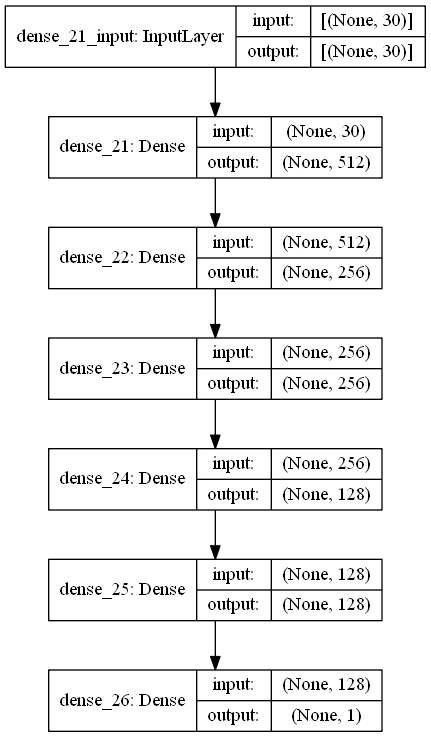

In [33]:
tf.keras.utils.plot_model(model,to_file='../pictures/NN_model.png',show_shapes=True)

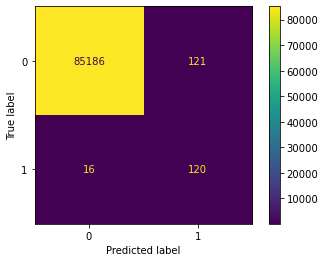

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.savefig('../pictures/NN_conf_mat.png',bbox_inches='tight')
plt.show()

In [67]:
saveModels(model,'../models/NN.h5')